<div style="text-align:center;font-size:40px"> Houssam NAJIH &  Mohamed Taha MAGHLAZI</div>

## Objectif
L'objectif de ce sujet d'étude est de comprendre et implémenter le modèle épidémiologique SIRD (Susceptibles, Infectés, Rétabli) avec une composante supplémentaire pour les décès. Vous utiliserez la méthode d'Euler pour résoudre numériquement le système d'équations différentielles qui décrit l'évolution de la maladie dans une population.
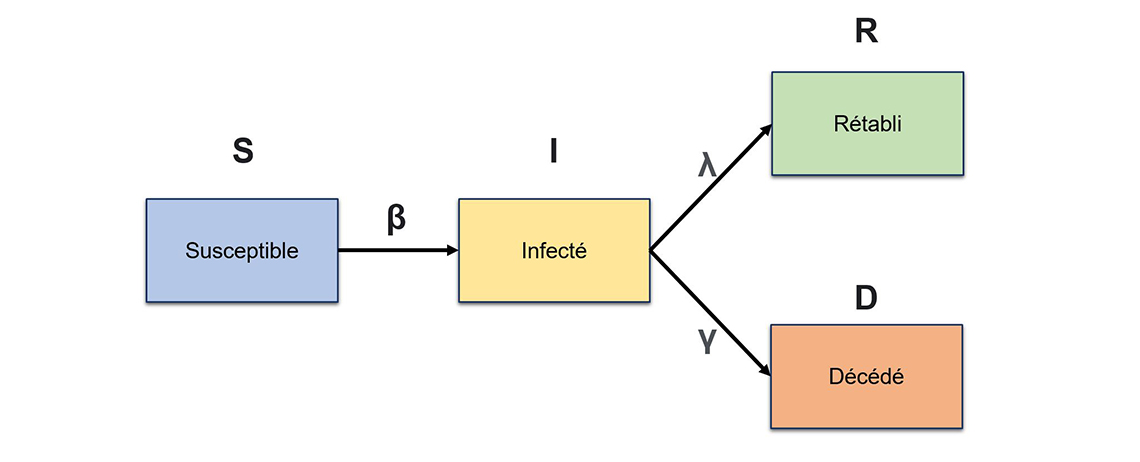


## Contexte
Le modèle SIR est un modèle mathématique utilisé en épidémiologie pour décrire la propagation d'une maladie infectieuse dans une population. Pour ce sujet, nous ajoutons une composante pour les décès (D), ce qui donne le modèle SIRD.

Les variables du modèle sont les suivantes :
- $S(t)$ : % de la population susceptibles d'être infectées à l'instant $t$
- $I(t)$ : % de la population infectées à l'instant $t$
- $R(t)$ : % de la population rétablies (et immunisées) à l'instant $t$
- $D(t)$ : % de la population décédées à l'instant $t$

Les paramètres du modèle sont :
- $\beta$ : Taux de transmission de la maladie (probabilité de transmission par contact)
- $\gamma$ : Taux de guérison (et d'immunisation)
- $\mu$ : Taux de mortalité dû à la maladie

Les équations différentielles qui décrivent le modèle SIRD sont :
- $\frac{dS}{dt} = -\beta \cdot S \cdot I$
- $\frac{dI}{dt} = \beta \cdot S \cdot I - \gamma \cdot I - \mu \cdot I$
- $\frac{dR}{dt} = \gamma \cdot I$
- $\frac{dD}{dt} = \mu \cdot I$

### Étape 1 : Implémentation de la méthode d'Euler
0. Discretiser le système d'équations différentielles
1. Écrire une fonction Python qui implémente la méthode d'Euler pour ce système d'équations différentielles. Cette fonction doit prendre en entrée :
    - Le paramétrage des équations différentielles
    - Les conditions initiales
    - Le pas de temps
    - La durée de la simulation

**Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**

In [1]:
import numpy as np

def euler_sird(S0, I0, R0, D0, beta, gamma, mu, step, num_steps):
    S, I, R, D = [S0], [I0], [R0], [D0]

    for _ in range(num_steps):
        S_new = S[-1] - step * beta * S[-1] * I[-1]
        I_new = I[-1] + step * (beta * S[-1] * I[-1] - gamma * I[-1] - mu * I[-1])
        R_new = R[-1] + step * gamma * I[-1]
        D_new = D[-1] + step * mu * I[-1]

        S.append(S_new)
        I.append(I_new)
        R.append(R_new)
        D.append(D_new)

    return np.array(S), np.array(I), np.array(R), np.array(D)

### Étape 2 : Simulation et analyse
1. Effectuer une simulation pour un jeu de paramètres donné:
- $\beta$ = 0.5
- $\gamma$ = 0.15
- $\mu$ = 0.015
- $S(0)$ = 99 %
- $I(0)$ = 1 %
- $R(0)$ = 0 %
- $D(0)$ = 0 %
- un pas de temps choisi (par exemple 0.01).
- **Rappel : Ici  t  est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée**
2. Tracer les courbes de $S(t)$, $I(t)$, $R(t)$ et $D(t)$ en fonction du temps.

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Conditions initiales
S0 = 0.99  
I0 = 0.01  
R0 = 0.0  
D0 = 0.0  

# Paramètres du modèle
beta = 0.5 
gamma = 0.15  
mu = 0.015  

# Paramètres de simulation
n_jours = 90  # Durée de la simulation (en jours)
step = 0.01  # Pas de temps
n_iteration = int(n_jours / step)  # Nombre de points de temps


# Définir la méthode d'Euler pour le modèle SIRD
def euler_sird(S0, I0, R0, D0, beta, gamma, mu, step, num_steps):
    S, I, R, D = [S0], [I0], [R0], [D0]

    for _ in range(num_steps):
        S_new = S[-1] - step * beta * S[-1] * I[-1]
        I_new = I[-1] + step * (beta * S[-1] * I[-1] - gamma * I[-1] - mu * I[-1])
        R_new = R[-1] + step * gamma * I[-1]
        D_new = D[-1] + step * mu * I[-1]

        S.append(S_new)
        I.append(I_new)
        R.append(R_new)
        D.append(D_new)

    return np.array(S), np.array(I), np.array(R), np.array(D)

S_simulation, I_simulation, R_simulation, D_simulation = euler_sird(S0, I0, R0, D0, beta, gamma, mu, step, n_iteration)

# Create a DataFrame to compare results with the given parameters
simulation_results_df = pd.DataFrame({
    'Jour': range(n_iteration + 1),
    'Susceptibles': S_simulation,
    'Infectés': I_simulation,
    'Rétablis': R_simulation,
    'Décès': D_simulation
})


print(simulation_results_df.head())

   Jour  Susceptibles  Infectés  Rétablis     Décès
0     0      0.990000  0.010000  0.000000  0.000000
1     1      0.989950  0.010033  0.000015  0.000001
2     2      0.989901  0.010066  0.000030  0.000003
3     3      0.989851  0.010099  0.000045  0.000005
4     4      0.989801  0.010133  0.000060  0.000006


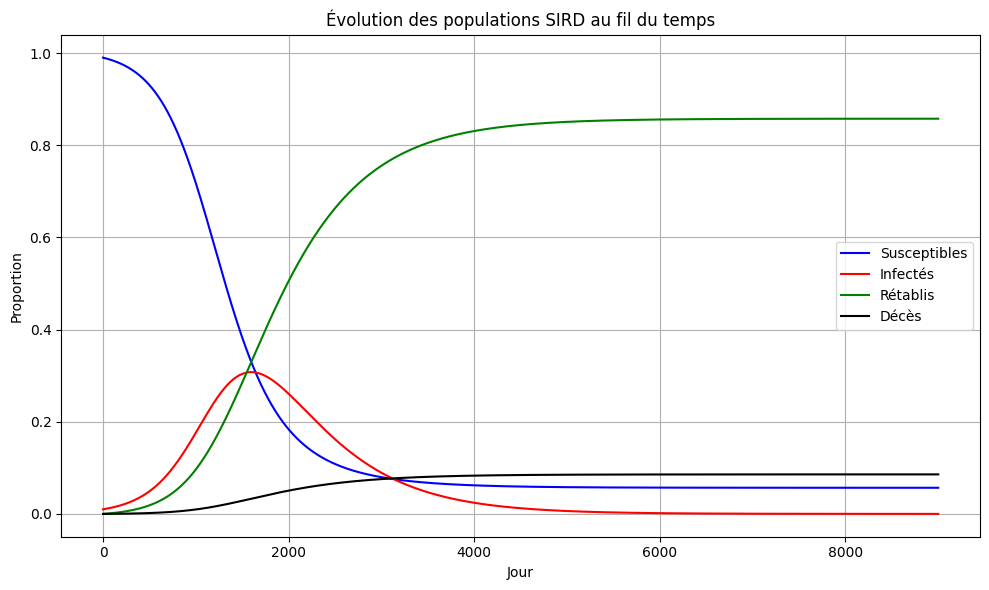

In [7]:
# Plotting all the results on a single graph
plt.figure(figsize=(10, 6))

# Susceptibles
plt.plot(simulation_results_df['Jour'], simulation_results_df['Susceptibles'], 'b', label='Susceptibles')

# Infectés
plt.plot(simulation_results_df['Jour'], simulation_results_df['Infectés'], 'r', label='Infectés')

# Rétablis
plt.plot(simulation_results_df['Jour'], simulation_results_df['Rétablis'], 'g', label='Rétablis')

# Décès
plt.plot(simulation_results_df['Jour'], simulation_results_df['Décès'], 'k', label='Décès')

# Labels and title
plt.xlabel('Jour')
plt.ylabel('Proportion')
plt.title('Évolution des populations SIRD au fil du temps')
plt.legend()
plt.grid(True)

# Show the plot
plt.tight_layout()
plt.show()


## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

### Objectif
L'objectif de cet exercice est de trouver les valeurs des paramètres $\beta\), \(\gamma\) et \(\mu\) qui permettent de reproduire au mieux les données générées de l'évolution de l'épidémie, en utilisant un dataset bruité.

### Instructions

1. **Lire les données du fichier `sird_dataset.csv`.**
2. **Implémenter une fonction de coût** qui mesure l'écart entre les données observées et les résultats du modèle SIRD pour un jeu de paramètres donné.(Justifiez votre choix, pourquoi un MSE au lieu d'une CCE ou inversement)
3. **Utiliser une méthode d'optimisation (Grid Search)** pour minimiser cette fonction de coût et trouver les valeurs optimales de $\beta$, $\gamma$ et $\mu$.

Voici les valeurs possible pour le triplet $\beta$, $\gamma$ et $\mu$ :
- $\beta$ varie de 0.25 à 0.5
- $\gamma$ varie de 0.08 à 0.15
- $\mu$ varie de 0.005 à 0.015

4. Visualisez sur un même graphique les résultats de votre modèle théorique optimal et les données empiriques.
**Rappel** : Ici $t$ est en jour, donc si votre pas est égale à 0.01, il vous faut effectuer 100 pas pour simuler toute une journée


In [8]:
# Charger le dataset
dataset_path = 'sird_dataset.csv'
data = pd.read_csv(dataset_path)
print(data.head())

   Jour  Susceptibles  Infectés  Rétablis     Décès
0     0      0.998894  0.003197 -0.002455 -0.004622
1     1      0.991526  0.000409  0.010702  0.008857
2     2      0.982164  0.011018  0.004865 -0.001515
3     3      0.988132  0.008969 -0.006308  0.003571
4     4      0.971090  0.007307  0.005403  0.004894


In [10]:
from sklearn.metrics import mean_squared_error


def SIR_ERROR(params, S0, I0, R0, D0, step, observed_data):
    beta, gamma, mu = params
    S, I, R, D = euler_sird(S0, I0, R0, D0, beta, gamma, mu, step, len(observed_data) * 100 - 1)

    error = mean_squared_error(observed_data['Susceptibles'], S[::100]) + \
            mean_squared_error(observed_data['Infectés'], I[::100]) + \
            mean_squared_error(observed_data['Rétablis'], R[::100]) + \
            mean_squared_error(observed_data['Décès'], D[::100])

    return error


# Paramètres initiaux pour l'estimation
initial_params = [0.3, 0.1, 0.01]

# Utilisation de la fonction pour calculer l'erreur avec les paramètres initiaux
S0 = data['Susceptibles'][0]
I0 = data['Infectés'][0]
R0 = data['Rétablis'][0]
D0 = data['Décès'][0]
step = 0.01  # Pas de temps

# Calculer l'erreur pour les paramètres initiaux
error = SIR_ERROR(initial_params, S0, I0, R0, D0, step, data)
print("Erreur initiale:", error)

Erreur initiale: 0.013408952648901896


In [11]:
from itertools import product


# Définir les plages de recherche pour les paramètres
beta_range = np.linspace(0.25, 0.5, 6)
gamma_range = np.linspace(0.08, 0.15, 8)
mu_range = np.linspace(0.005, 0.015, 11)

# Initialiser les meilleurs paramètres et l'erreur minimale
best_params = None
min_error = float('inf')

# Effectuer une recherche par grille
for beta, gamma, mu in product(beta_range, gamma_range, mu_range):
    params = [beta, gamma, mu]
    error = SIR_ERROR(params, S0, I0, R0, D0, step, data)
    if error < min_error:
        min_error = error
        best_params = params

# Afficher les meilleurs paramètres et l'erreur minimale
print("Meilleurs paramètres:", best_params)
print("Erreur minimale:", min_error)

Meilleurs paramètres: [0.35, 0.11, 0.011999999999999999]
Erreur minimale: 0.000881105613284023


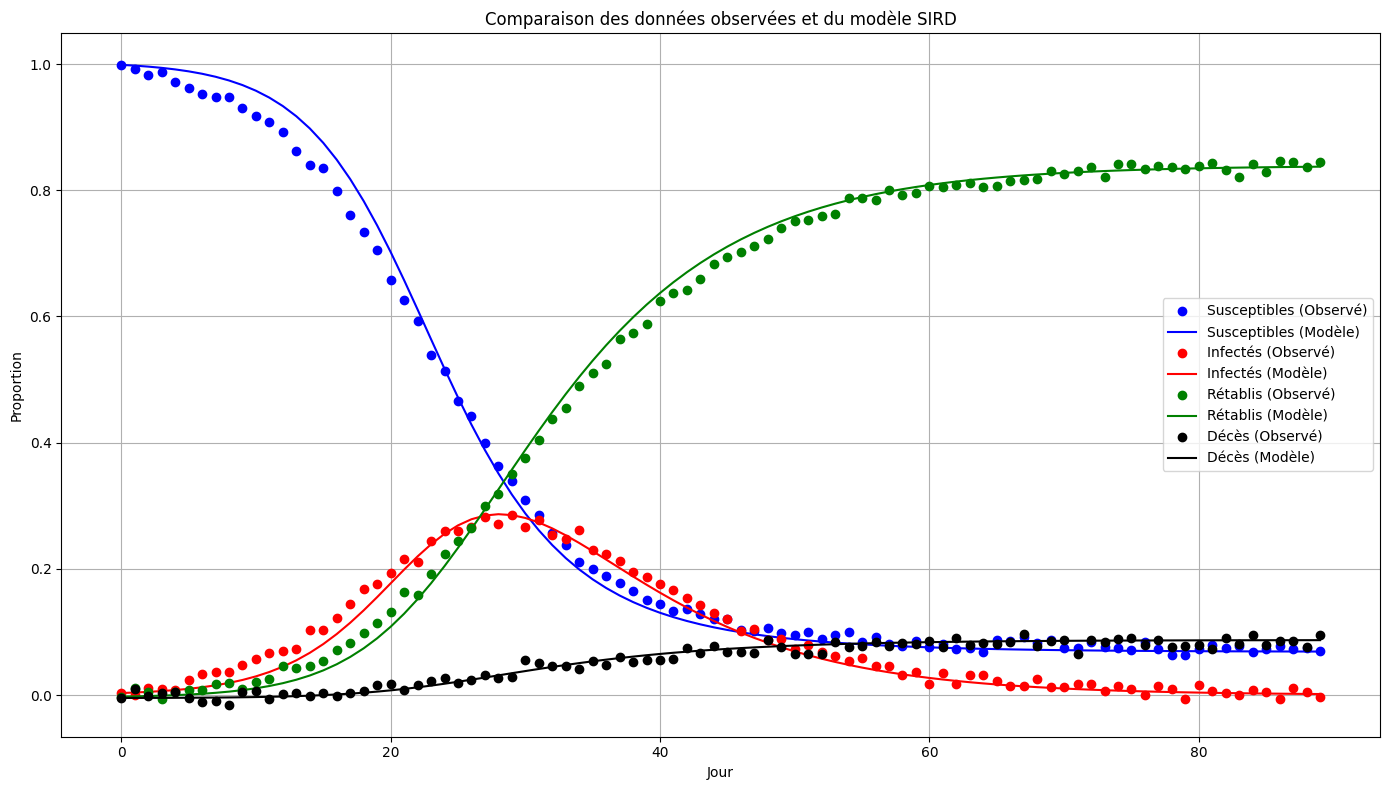

In [12]:
# Paramètres optimaux trouvés par la recherche par grille
beta_opt, gamma_opt, mu_opt = best_params

# Appliquer la méthode d'Euler avec les paramètres optimaux
S_opt, I_opt, R_opt, D_opt = euler_sird(S0, I0, R0, D0, beta_opt, gamma_opt, mu_opt, step, len(data) * 100 - 1)

# Créer un DataFrame pour les résultats de la simulation optimale
optimal_results_df = pd.DataFrame({
    'Jour': np.arange(0, len(data) * 100) * step,
    'Susceptibles (Opt)': S_opt,
    'Infectés (Opt)': I_opt,
    'Rétablis (Opt)': R_opt,
    'Décès (Opt)': D_opt
})

# Tracer les résultats incluant les susceptibles
plt.figure(figsize=(14, 8))

# Susceptibles
plt.plot(data['Jour'], data['Susceptibles'], 'bo', label='Susceptibles (Observé)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Susceptibles (Opt)'][::100], 'b-',
         label='Susceptibles (Modèle)')

# Infectés
plt.plot(data['Jour'], data['Infectés'], 'ro', label='Infectés (Observé)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Infectés (Opt)'][::100], 'r-',
         label='Infectés (Modèle)')

# Rétablis
plt.plot(data['Jour'], data['Rétablis'], 'go', label='Rétablis (Observé)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Rétablis (Opt)'][::100], 'g-',
         label='Rétablis (Modèle)')

# Décès
plt.plot(data['Jour'], data['Décès'], 'ko', label='Décès (Observé)')
plt.plot(optimal_results_df['Jour'][::100], optimal_results_df['Décès (Opt)'][::100], 'k-', label='Décès (Modèle)')

# Étiquettes et titre
plt.xlabel('Jour')
plt.ylabel('Proportion')
plt.title('Comparaison des données observées et du modèle SIRD')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()

### Étape 4 : Scénarios de contrôle
On introduit un paramètre d'observation $R_0$ (le nombre de reproduction de base) dans le contexte du modèle SIRD est :

- $\ R_0 = \frac{\beta}{\gamma + \mu} \$

1. Expliquez intuitivement ce paramètre d'observation quand $R_0<1$ et quand $R_0>1$
2. Introduire une intervention (par exemple, la réduction de $\beta$ due à des mesures de distanciation sociale) et analyser son impact sur la dynamique de l'épidémie.
3. Comparer les scénarios avec et sans intervention.

1.

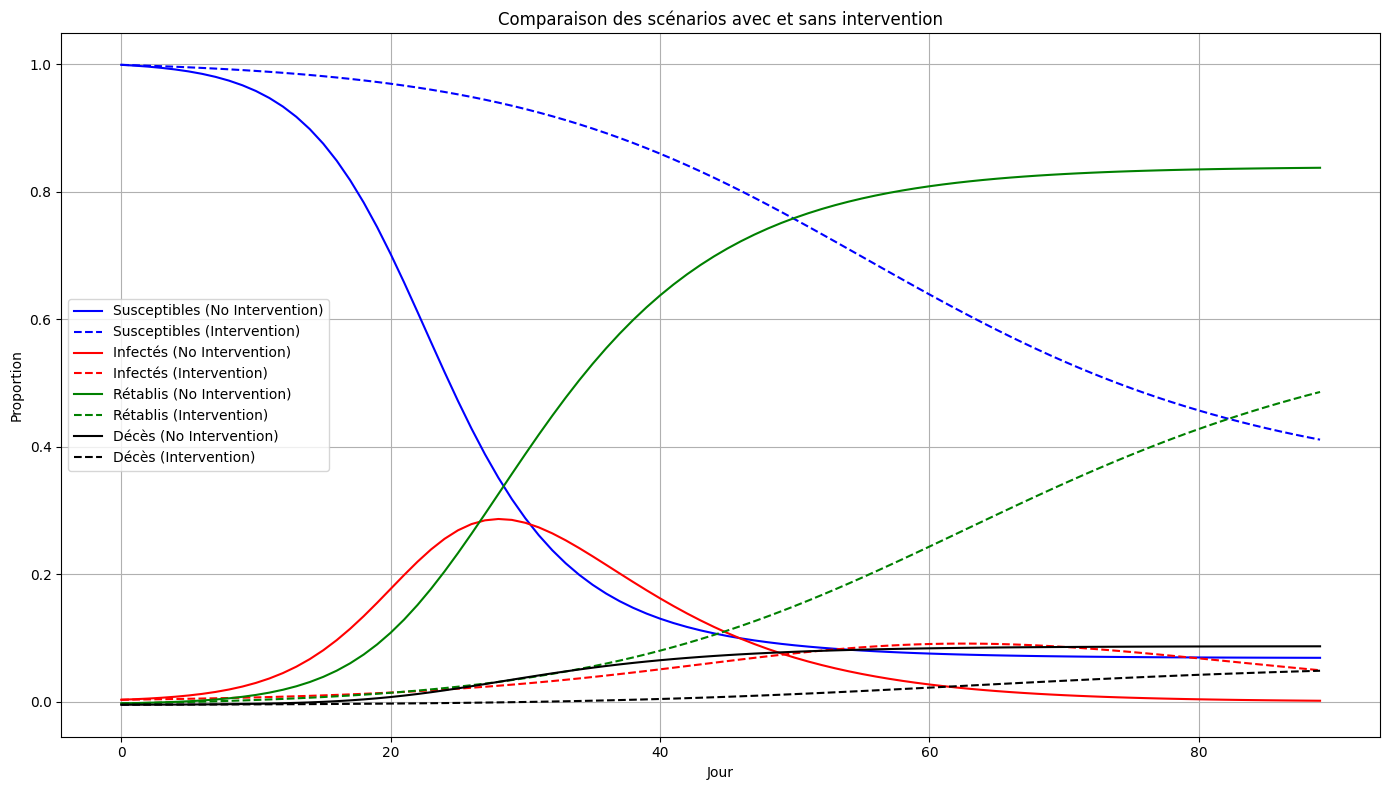

In [14]:
# Paramètres optimaux sans intervention
beta_no_intervention = 0.35
gamma_opt = 0.11
mu_opt = 0.012

# Paramètres avec intervention
beta_intervention = 0.2

# Simulation sans intervention
S_no_int, I_no_int, R_no_int, D_no_int = euler_sird(S0, I0, R0, D0, beta_no_intervention, gamma_opt, mu_opt, step,
                                                    len(data) * 100 - 1)

# Simulation avec intervention
S_int, I_int, R_int, D_int = euler_sird(S0, I0, R0, D0, beta_intervention, gamma_opt, mu_opt, step, len(data) * 100 - 1)

# Créer des DataFrames pour les résultats
no_intervention_df = pd.DataFrame({
    'Jour': np.arange(0, len(data) * 100) * step,
    'Susceptibles': S_no_int,
    'Infectés': I_no_int,
    'Rétablis': R_no_int,
    'Décès': D_no_int
})

intervention_df = pd.DataFrame({
    'Jour': np.arange(0, len(data) * 100) * step,
    'Susceptibles': S_int,
    'Infectés': I_int,
    'Rétablis': R_int,
    'Décès': D_int
})



# Tracé des résultats pour comparaison
plt.figure(figsize=(14, 8))

# Susceptibles
plt.plot(no_intervention_df['Jour'][::100], no_intervention_df['Susceptibles'][::100], 'b-',
         label='Susceptibles (No Intervention)')
plt.plot(intervention_df['Jour'][::100], intervention_df['Susceptibles'][::100], 'b--',
         label='Susceptibles (Intervention)')

# Infectés
plt.plot(no_intervention_df['Jour'][::100], no_intervention_df['Infectés'][::100], 'r-',
         label='Infectés (No Intervention)')
plt.plot(intervention_df['Jour'][::100], intervention_df['Infectés'][::100], 'r--', label='Infectés (Intervention)')

# Rétablis
plt.plot(no_intervention_df['Jour'][::100], no_intervention_df['Rétablis'][::100], 'g-',
         label='Rétablis (No Intervention)')
plt.plot(intervention_df['Jour'][::100], intervention_df['Rétablis'][::100], 'g--', label='Rétablis (Intervention)')

# Décès
plt.plot(no_intervention_df['Jour'][::100], no_intervention_df['Décès'][::100], 'k-', label='Décès (No Intervention)')
plt.plot(intervention_df['Jour'][::100], intervention_df['Décès'][::100], 'k--', label='Décès (Intervention)')

# Étiquettes et titre
plt.xlabel('Jour')
plt.ylabel('Proportion')
plt.title('Comparaison des scénarios avec et sans intervention')
plt.legend()
plt.grid(True)

# Afficher le graphique
plt.tight_layout()
plt.show()


3.